# Proyek UTS PMDPM Gasal 2023/2024
Nama Anggota Kelompok:


*   Rizky Ardiansyah Ramadhan
*   Reinaldy Restu Aji
*   Marcello Aaron Kurniawan
*   Teofilos Mas Krisna Dewa



### Inisialisasi

- Import library yang dibutuhkan

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Data Loading

- Proses data loading (boleh dengan file upload atau dengan mount drive jika menggunakan Google Colab)

In [11]:
from google.colab import drive
drive.mount('/content/drive')
properti = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset Property/Dataset UTS_Gasal 2425.csv")
properti.head(10000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.50000,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.10000,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.30000,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.20000,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.10000,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.30000,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.90000,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.90000,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.00000,Basic


Dalam dataset ini terdiri dari beberapa kolom yaitu:
*   squaremeters: Luas properti dalam meter persegi.
*   numberofrooms: Jumlah kamar di properti.
*   hasyard: Menunjukkan apakah properti memiliki halaman (yard) atau tidak (yes/no).
*   haspool: Menunjukkan apakah properti memiliki kolam renang (pool) atau tidak (yes/no).
*   floors: Jumlah lantai di properti.
*   citycode: Kode kota tempat properti berada.
*   citypartrange: Rentang bagian kota.
*   numprevowners: Jumlah pemilik sebelumnya.
*   made: Tahun pembuatan properti.
*   isnewbuilt: Menunjukkan apakah properti baru dibangun atau tidak (new/old).
*   hasstormprotector: Menunjukkan apakah properti memiliki pelindung badai (storm protector) atau tidak (yes/no).
*   basement: Menunjukkan apakah properti memiliki basement atau tidak.
*   attic: Menunjukkan apakah properti memiliki loteng (attic) atau tidak.
*   garage: Menunjukkan apakah properti memiliki garasi atau tidak.
*   hasstorageroom: Menunjukkan apakah properti memiliki ruang penyimpanan (storage room) atau tidak (yes/no).
*   List item
*   hasguestroom: Menunjukkan apakah properti memiliki kamar tamu (guest room) atau tidak (yes/no).
*   price: Harga properti.
*   category: Kategori properti (misalnya, Luxury, Middle, dll.).

















### Data Cleansing & Encoding

- Bagian berikut berisi proses pembersihan data.
- Periksa apakah terdapat missing value dan data duplikat,
- Ubah data kategorik string menjadi numerik.
- Jika jumlah kelas pada data latih tidak seimbang, kalian dapat menggunakan metode oversampling.
- Untuk **Klasifikasi**, pastikan **Harga menjadi target** dan **kolom Kategori dihapus**.

In [12]:
print("#" * 50)
print("Informasi Umum tentang DataFrame:")
print("#" * 50)
properti.info()
print("\n")

print("#" * 50)
print("Missing Values per Column:")
print("#" * 50)
print(properti.isnull().sum())
print("\n")

print("#" * 50)
print("Jumlah Baris Duplikat:")
print("#" * 50)
print(properti.duplicated().sum())
print("\n")

if properti.duplicated().sum() > 0:
    print("#" * 50)
    print("Baris Duplikat:")
    print("#" * 50)
    print(properti[properti.duplicated()])
else:
    print("#" * 50)
    print("Tidak ada baris duplikat.")
    print("#" * 50)

##################################################
Informasi Umum tentang DataFrame:
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-nu

- Semua kolom memiliki nilai non-null, menunjukkan tidak ada data yang hilang.
- Setiap fitur dalam dataset dapat digunakan tanpa perlu penanganan nilai hilang.
- Terdapat 0 baris duplikat dalam dataset, memastikan bahwa setiap entri unik.

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

properti.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [14]:
df_properti = properti.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

**Cek jumlah kelas**

In [15]:
columns_to_check = ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
                    'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
                    'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
                    'hasguestroom', 'price', 'category']

for col in columns_to_check:
    print("#" * 50)
    print(f"Distribusi kelas untuk kolom: {col}")
    print("#" * 50)

    print(properti[col].value_counts())

    if properti[col].dtype in ['float64', 'int64']:
        print("\nStatistik Deskriptif:")
        print(properti[col].describe())

    print("\n")


##################################################
Distribusi kelas untuk kolom: squaremeters
##################################################
squaremeters
33749    3
68985    3
84311    3
52141    3
96526    3
        ..
96930    1
68572    1
98822    1
93762    1
44403    1
Name: count, Length: 9483, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean    49870.13120
std     28774.37535
min        89.00000
25%     25098.50000
50%     50105.50000
75%     74609.75000
max     99999.00000
Name: squaremeters, dtype: float64


##################################################
Distribusi kelas untuk kolom: numberofrooms
##################################################
numberofrooms
54    129
4     120
22    119
47    118
3     116
     ... 
6      85
34     84
31     84
40     82
9      75
Name: count, Length: 100, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean       50.35840
std        28.81670
min         1.00000
25%        25.00000
50%        50.00000
75%      

Kolom category:

- Basic: 4344
- Luxury: 3065
- Middle: 2591

Ini menunjukkan sedikit ketidakseimbangan. Kategori Basic memiliki jumlah yang jauh lebih banyak dibandingkan Luxury dan Middle. Dalam kasus klasifikasi, ini mungkin bisa menyebabkan ketidakseimbangan performa model, terutama jika model lebih cenderung ke kelas yang lebih dominan.

In [41]:
X = df_properti.drop(columns=['price', 'category'], axis=1)
y = df_properti['category']

X_train_bf, X_test, y_train_bf, y_test = train_test_split(X, y, test_size=0.30, random_state=77)
print(f"Shape of X_train: {X_train_bf.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (7000, 16)
Shape of X_test: (3000, 16)


In [42]:
print(X.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom'],
      dtype='object')


- Mengubah variabel kategori menjadi numerik.
- Membagi data menjadi set pelatihan dan pengujian.

In [43]:
cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

In [44]:
X_train_enc = transformer.fit_transform(X_train_bf)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,63.00000,55.00000,20424.00000,1.00000,1.00000,2004.00000,2001.00000,2817.00000,944.00000,9.00000
1,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,80.00000,12.00000,40356.00000,9.00000,4.00000,2021.00000,5685.00000,6810.00000,914.00000,1.00000
2,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,26.00000,39.00000,97335.00000,1.00000,5.00000,1992.00000,1891.00000,7697.00000,970.00000,4.00000
3,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,9.00000,45.00000,75550.00000,6.00000,2.00000,2000.00000,8360.00000,9493.00000,190.00000,5.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,58.00000,73.00000,52386.00000,3.00000,8.00000,2007.00000,372.00000,8941.00000,438.00000,4.00000
5,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,94.00000,57.00000,65876.00000,7.00000,5.00000,2021.00000,6677.00000,2068.00000,185.00000,3.00000
6,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,83.00000,79.00000,74999.00000,2.00000,8.00000,2010.00000,2595.00000,7348.00000,850.00000,0.00000
7,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,...,65.00000,46.00000,49113.00000,2.00000,10.00000,1995.00000,5226.00000,5244.00000,682.00000,4.00000
8,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,27.00000,58.00000,25553.00000,7.00000,10.00000,1994.00000,8279.00000,7190.00000,183.00000,7.00000
9,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,3.00000,61.00000,72814.00000,6.00000,5.00000,2001.00000,4387.00000,1227.00000,775.00000,9.00000


In [45]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

print(X_train_enc)

[[1.00 0.00 1.00 ... 746.00 758.00 3.00]
 [1.00 0.00 1.00 ... 4130.00 975.00 10.00]
 [0.00 1.00 0.00 ... 1522.00 103.00 3.00]
 ...
 [1.00 0.00 0.00 ... 2347.00 292.00 9.00]
 [1.00 0.00 0.00 ... 4500.00 767.00 3.00]
 [1.00 0.00 0.00 ... 3734.00 196.00 10.00]]


In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=77)

X_folds = []
y_folds = []

for train_index, test_index in kf.split(X_train_enc, y_train_bf):
    X_folds.append((X_train_enc[train_index], X_train_enc[test_index]))
    y_folds.append((y_train_bf.iloc[train_index], y_train_bf.iloc[test_index]))

print(f"Total folds created: {len(X_folds)}")

Total folds created: 5


In [47]:
pipe_GBC = Pipeline(steps=[
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', GradientBoostingClassifier(random_state=77))
])

params_grid_GBC = [
    {
        'data scaling': [StandardScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__n_estimators': [100, 150],
        'clf__learning_rate': [0.01, 0.1, 1],
        'clf__max_depth': [3, 5, 7]
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__n_estimators': [50, 100, 150],
        'clf__learning_rate': [0.01, 0.1, 1],
        'clf__max_depth': [3, 5, 7]
    },
    {
        'data scaling': [StandardScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__n_estimators': [50, 100, 150],
        'clf__learning_rate': [0.01, 0.1, 1],
        'clf__max_depth': [3, 5, 7]
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__n_estimators': [50, 100, 150],
        'clf__learning_rate': [0.01, 0.1, 1],
        'clf__max_depth': [3, 5, 7]
    }
]

GSCV_GBC = GridSearchCV(pipe_GBC, params_grid_GBC, cv=kf, scoring='accuracy', error_score='raise')
GSCV_GBC.fit(X_train_enc, y_train_bf)
print("Gradient Boosting Classifier training finished")


Gradient Boosting Classifier training finished


CV Score: 0.9994285714285714
Test Score: 0.999
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectPercentile(percentile=46)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            n_estimators=50,
                                            random_state=77))])


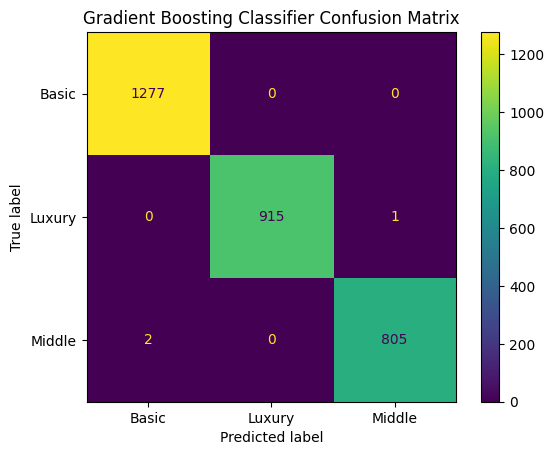

Classification report Gradient Boosting Classifier: 
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1277
      Luxury       1.00      1.00      1.00       916
      Middle       1.00      1.00      1.00       807

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [48]:
print("CV Score: {}".format(GSCV_GBC.best_score_))
print("Test Score: {}".format(GSCV_GBC.best_estimator_.score(X_test_enc, y_test)))
print("Best model:", GSCV_GBC.best_estimator_)

gbc_pred = GSCV_GBC.predict(X_test_enc)

cm = confusion_matrix(y_test, gbc_pred, labels=GSCV_GBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_GBC.classes_)
disp.plot()
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.show()

print("Classification report Gradient Boosting Classifier: \n", classification_report(y_test, gbc_pred))

In [49]:
pipe_SVC = Pipeline(steps=[
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', SVC(class_weight='balanced', random_state=77))
])

params_grid_SVC = [
    {
        'data scaling': [StandardScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__kernel': ['linear']
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__kernel': ['linear']
    },
    {
        'data scaling': [StandardScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__kernel': ['rbf']
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__kernel': ['rbf']
    }
]

GSCV_SVC = GridSearchCV(pipe_SVC, params_grid_SVC, cv=skf, scoring='accuracy', error_score='raise')
GSCV_SVC.fit(X_train_enc, y_train_bf)
print("Support Vector Classifier training finished")


Support Vector Classifier training finished


CV Score: 0.9947142857142858
Test Score: 0.997
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectPercentile(percentile=31)),
                ('clf', SVC(C=100, class_weight='balanced', random_state=77))])


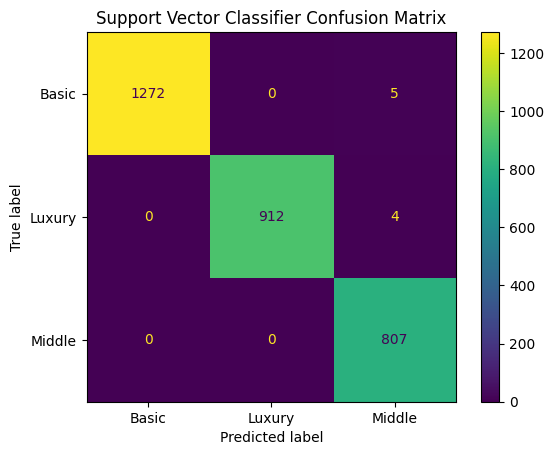

Classification report Support Vector Classifier: 
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1277
      Luxury       1.00      1.00      1.00       916
      Middle       0.99      1.00      0.99       807

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [50]:
print("CV Score: {}".format(GSCV_SVC.best_score_))
print("Test Score: {}".format(GSCV_SVC.best_estimator_.score(X_test_enc, y_test)))
print("Best model:", GSCV_SVC.best_estimator_)

svc_pred = GSCV_SVC.predict(X_test_enc)

cm = confusion_matrix(y_test, svc_pred, labels=GSCV_SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVC.classes_)
disp.plot()
plt.title("Support Vector Classifier Confusion Matrix")
plt.show()

print("Classification report Support Vector Classifier: \n", classification_report(y_test, svc_pred))

### 1. **Cross-Validation Score (CV Score)**
   - **Gradient Boosting Classifier:** 0.9994
   - **SVC:** 0.9947
   
   **Penjelasan:**
   CV Score menunjukkan performa rata-rata model pada beberapa subset data selama proses pelatihan. **Gradient Boosting Classifier** memiliki CV Score yang sedikit lebih tinggi dibandingkan **SVC** (0.9994 vs. 0.9947). Ini menunjukkan bahwa Gradient Boosting sedikit lebih baik dalam hal kestabilan dan akurasi di berbagai subset data.

### 2. **Test Score**
   - **Gradient Boosting Classifier:** 0.999
   - **SVC:** 0.997
   
   **Penjelasan:**
   Test Score mengukur akurasi model pada data uji yang tidak pernah dilihat oleh model selama pelatihan. **Gradient Boosting Classifier** memiliki Test Score yang lebih tinggi (0.999) dibandingkan dengan **SVC** (0.997). Ini menunjukkan bahwa Gradient Boosting lebih akurat dalam memprediksi kelas pada data uji dibandingkan SVC.

### 3. **Classification Report**
   - **Gradient Boosting Classifier:**
     - Precision, recall, dan f1-score semuanya **1.00** untuk ketiga kelas (Basic, Luxury, Middle). Ini berarti **Gradient Boosting Classifier** menghasilkan prediksi yang sempurna di semua metrik dan kelas, tanpa kesalahan.
   
   - **Support Vector Classifier (SVC):**
     - Precision dan recall untuk kelas **Basic** dan **Luxury** juga **1.00**, menunjukkan performa sempurna untuk kedua kelas tersebut.
     - Untuk kelas **Middle**, precision adalah **0.99**, dan recall adalah **1.00**, dengan f1-score **0.99**. Ini menunjukkan bahwa SVC sedikit kurang akurat dalam memprediksi kelas **Middle**, meskipun masih sangat baik.

### 4. **Akurasi Keseluruhan**
   - **Gradient Boosting Classifier:** 100% akurasi
   - **SVC:** 100% akurasi

   **Penjelasan:**
   Meskipun kedua model memiliki akurasi keseluruhan yang sama (100%), perbedaan kecil terlihat dalam presisi dan recall untuk kelas **Middle**, di mana Gradient Boosting unggul dengan skor sempurna dibandingkan dengan SVC yang memiliki precision **0.99** untuk kelas ini.

### 5. **Kesimpulan**
   **Gradient Boosting Classifier** lebih unggul dalam beberapa aspek:
   - **CV Score** dan **Test Score** yang sedikit lebih tinggi menunjukkan model ini lebih stabil dan akurat secara keseluruhan.
   - **Classification report** untuk **Gradient Boosting** menunjukkan prediksi yang sempurna di semua kelas, sedangkan **SVC** sedikit kurang akurat di kelas **Middle**.
   
   Oleh karena itu, **Gradient Boosting Classifier** adalah model yang lebih baik dalam hal performa keseluruhan dan akurasi pada data uji serta cross-validation, meskipun **SVC** juga menunjukkan hasil yang hampir sempurna.